In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/data_raw/erp_sales_sample.csv")

# Quick look
print(df.shape)   # rows, columns
display(df.head(10))


(1000, 10)


,order_id,customer_id,product_id,store_id,region,sales_channel,order_date,quantity,unit_price,discount
0,1000,C0103,P040,S02,West,Offline,2023-01-01,2,210,0.05
1,1001,C0180,P049,S02,East,Online,2023-01-02,2,976,0.00
2,1002,C0093,P044,S02,West,Online,2023-01-03,1,1977,0.10
3,1003,C0015,P019,S02,North,Offline,2023-01-04,1,1166,0.15
4,1004,C0107,P042,S02,East,Offline,2023-01-05,3,310,0.15
5,1005,C0072,P041,S02,South,Offline,2023-01-06,3,1323,0.05
6,1006,C0189,P037,S04,East,Online,2023-01-07,5,1933,0.05
7,1007,C0021,P006,S01,East,Online,2023-01-08,1,957,0.15
8,1008,C0103,P026,S03,Central,Online,2023-01-09,5,1875,0.05
9,1009,C0122,P034,S05,East,Offline,2023-01-10,4,726,0.10


In [2]:
# Info about dataset
df.info()

# Summary statistics
display(df.describe(include="all"))

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       1000 non-null   int64  
 1   customer_id    1000 non-null   object 
 2   product_id     1000 non-null   object 
 3   store_id       1000 non-null   object 
 4   region         1000 non-null   object 
 5   sales_channel  1000 non-null   object 
 6   order_date     1000 non-null   object 
 7   quantity       1000 non-null   int64  
 8   unit_price     1000 non-null   int64  
 9   discount       1000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


,order_id,customer_id,product_id,store_id,region,sales_channel,order_date,quantity,unit_price,discount
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,198,50,5,5,2,1000,NaN,NaN,NaN
top,NaN,C0190,P029,S04,West,Online,2023-01-01,NaN,NaN,NaN
freq,NaN,13,31,220,215,524,1,NaN,NaN,NaN
mean,1499.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.092000,1078.866000,0.073750
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,1.400535,548.171858,0.055511
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.000000,0.000000
25%,1249.750000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,597.750000,0.050000
50%,1499.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1122.000000,0.050000
75%,1749.250000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1566.250000,0.100000


order_id         0
customer_id      0
product_id       0
store_id         0
region           0
sales_channel    0
order_date       0
quantity         0
unit_price       0
discount         0
dtype: int64


In [3]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   object        
 2   product_id     1000 non-null   object        
 3   store_id       1000 non-null   object        
 4   region         1000 non-null   object        
 5   sales_channel  1000 non-null   object        
 6   order_date     1000 non-null   datetime64[ns]
 7   quantity       1000 non-null   int64         
 8   unit_price     1000 non-null   int64         
 9   discount       1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 78.3+ KB


In [4]:
df['net_sales'] = df['quantity'] * df['unit_price'] * (1 - df['discount'])
df.head()


,order_id,customer_id,product_id,store_id,region,sales_channel,order_date,quantity,unit_price,discount,net_sales
0,1000,C0103,P040,S02,West,Offline,2023-01-01,2,210,0.05,399.0
1,1001,C0180,P049,S02,East,Online,2023-01-02,2,976,0.00,1952.0
2,1002,C0093,P044,S02,West,Online,2023-01-03,1,1977,0.10,1779.3
3,1003,C0015,P019,S02,North,Offline,2023-01-04,1,1166,0.15,991.1
4,1004,C0107,P042,S02,East,Offline,2023-01-05,3,310,0.15,790.5


In [5]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 order_id         0
customer_id      0
product_id       0
store_id         0
region           0
sales_channel    0
order_date       0
quantity         0
unit_price       0
discount         0
net_sales        0
dtype: int64


In [6]:
# Example: fill missing store_id with "Unknown"
df['store_id'] = df['store_id'].fillna("Unknown")

# For numerical columns, you can fill with 0 or mean if needed
df['quantity'] = df['quantity'].fillna(df['quantity'].mean())


In [7]:
df.to_csv("../data/data_processed/erp_sales_cleaned.csv", index=False)
print("✅ Cleaned dataset saved in data/data_processed/")


OSError: Cannot save file into a non-existent directory: '..\data\data_processed'

In [9]:
import os

os.makedirs("../data/data_processed", exist_ok=True)


In [10]:
df.to_csv("../data/data_processed/erp_sales_cleaned.csv", index=False)
print("✅ Cleaned dataset saved in data/data_processed/")


✅ Cleaned dataset saved in data/data_processed/


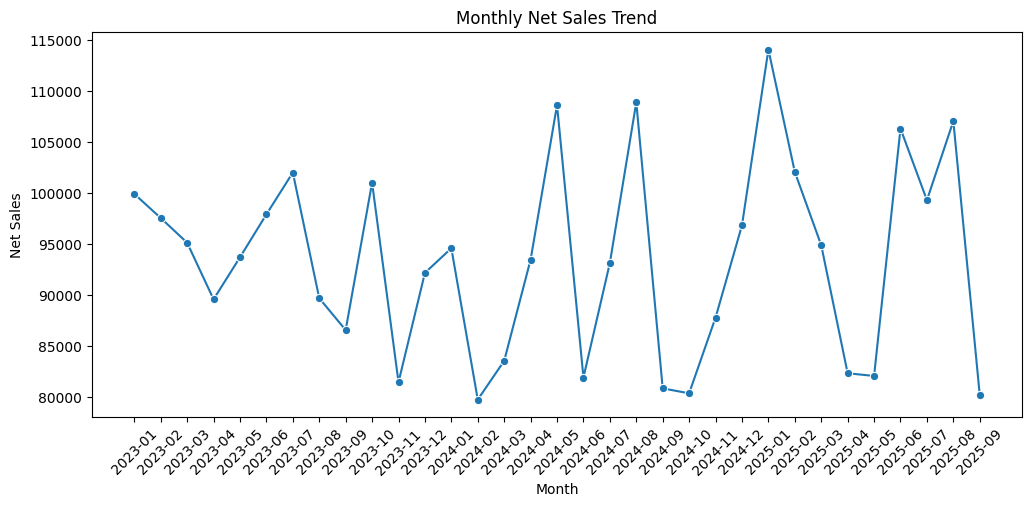

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate net sales by month
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['net_sales'].sum().reset_index()

# Convert month to string for plotting
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(x='month', y='net_sales', data=monthly_sales, marker='o')  # single-character marker
plt.title("Monthly Net Sales Trend")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_2116\842192657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


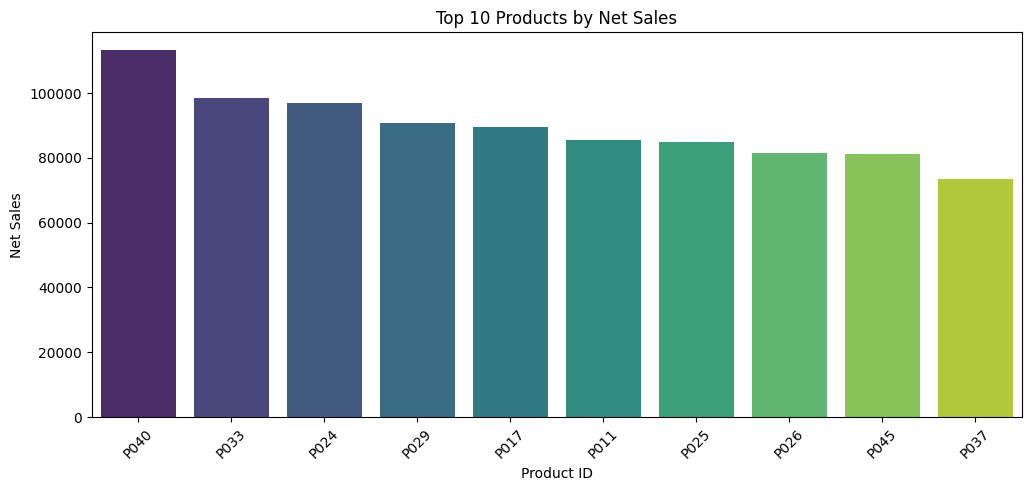

In [14]:
top_products = df.groupby('product_id')['net_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 10 Products by Net Sales")
plt.xlabel("Product ID")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_2116\4154836270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")


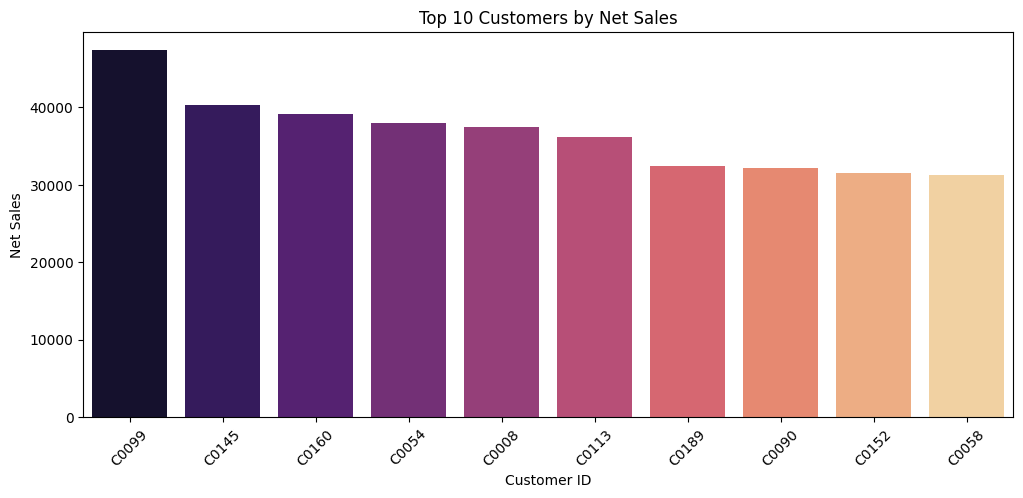

In [15]:
top_customers = df.groupby('customer_id')['net_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")
plt.title("Top 10 Customers by Net Sales")
plt.xlabel("Customer ID")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_2116\2440528863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Set2")


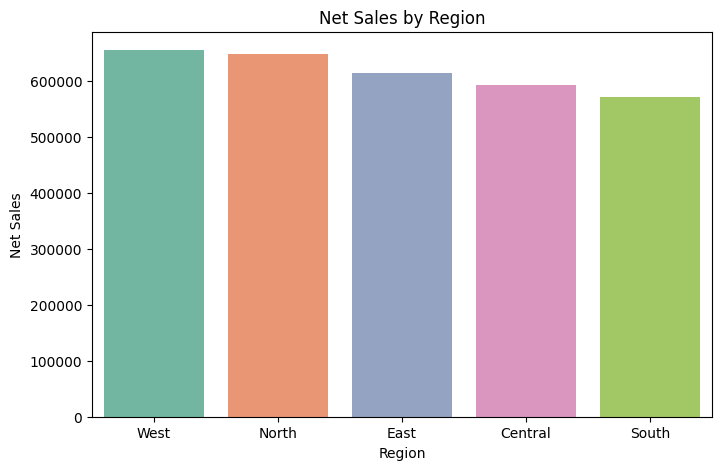

In [16]:
region_sales = df.groupby('region')['net_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Set2")
plt.title("Net Sales by Region")
plt.xlabel("Region")
plt.ylabel("Net Sales")
plt.show()


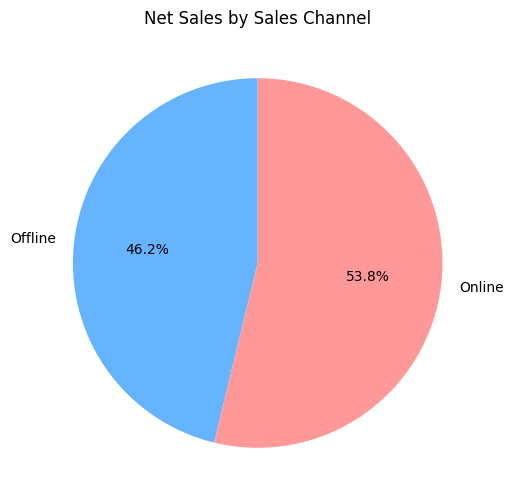

In [18]:
import matplotlib.pyplot as plt

# Aggregate net sales by sales channel
channel_sales = df.groupby('sales_channel')['net_sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Net Sales by Sales Channel")
plt.show()


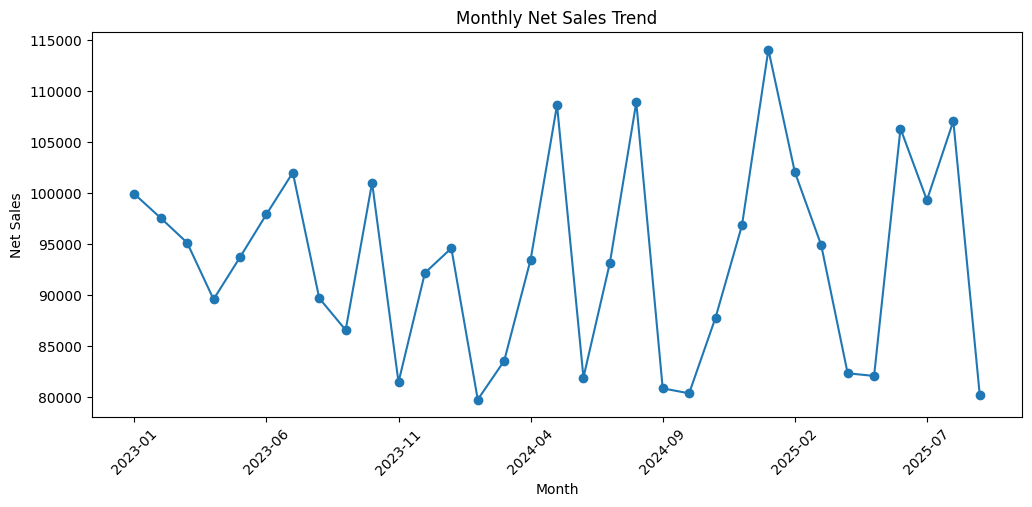

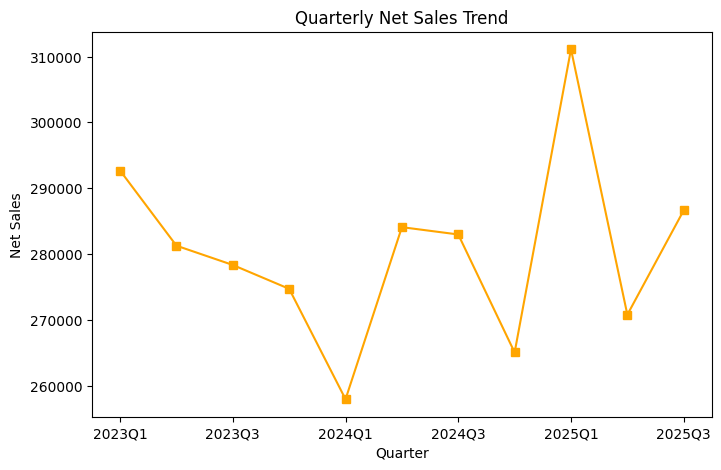

In [19]:
# Aggregate by month
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['net_sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)  # convert Period to str

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Net Sales Trend")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()

# Aggregate by quarter
quarterly_sales = df.groupby(df['order_date'].dt.to_period('Q'))['net_sales'].sum()
quarterly_sales.index = quarterly_sales.index.astype(str)

plt.figure(figsize=(8,5))
quarterly_sales.plot(marker='s', color='orange')
plt.title("Quarterly Net Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Net Sales")
plt.show()


In [20]:
# Total spend per customer
customer_sales = df.groupby('customer_id')['net_sales'].sum()

# Segment customers
top_customers = customer_sales[customer_sales >= customer_sales.quantile(0.75)]
mid_customers = customer_sales[(customer_sales < customer_sales.quantile(0.75)) & (customer_sales >= customer_sales.quantile(0.25))]
low_customers = customer_sales[customer_sales < customer_sales.quantile(0.25)]

print("Top Customers Count:", len(top_customers))
print("Mid-tier Customers Count:", len(mid_customers))
print("Low-tier Customers Count:", len(low_customers))


Top Customers Count: 50
Mid-tier Customers Count: 98
Low-tier Customers Count: 50


In [21]:
product_sales = df.groupby('product_id')['net_sales'].sum()

top_products = product_sales[product_sales >= product_sales.quantile(0.75)]
mid_products = product_sales[(product_sales < product_sales.quantile(0.75)) & (product_sales >= product_sales.quantile(0.25))]
low_products = product_sales[product_sales < product_sales.quantile(0.25)]

print("Top Products Count:", len(top_products))
print("Mid-tier Products Count:", len(mid_products))
print("Low-tier Products Count:", len(low_products))


Top Products Count: 13
Mid-tier Products Count: 24
Low-tier Products Count: 13


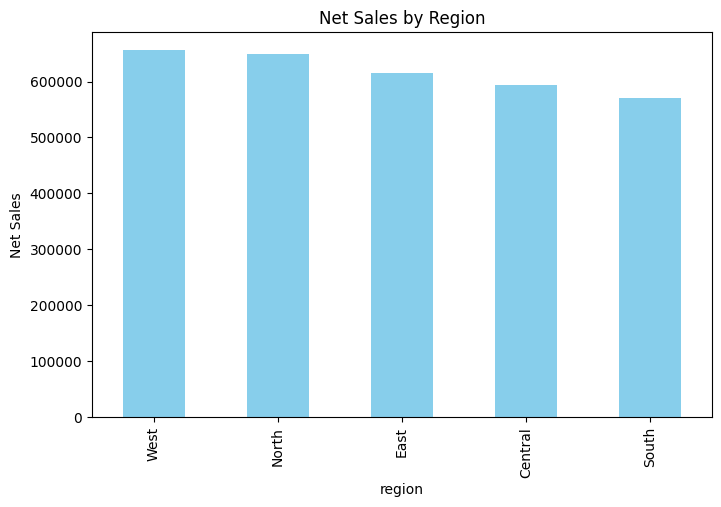

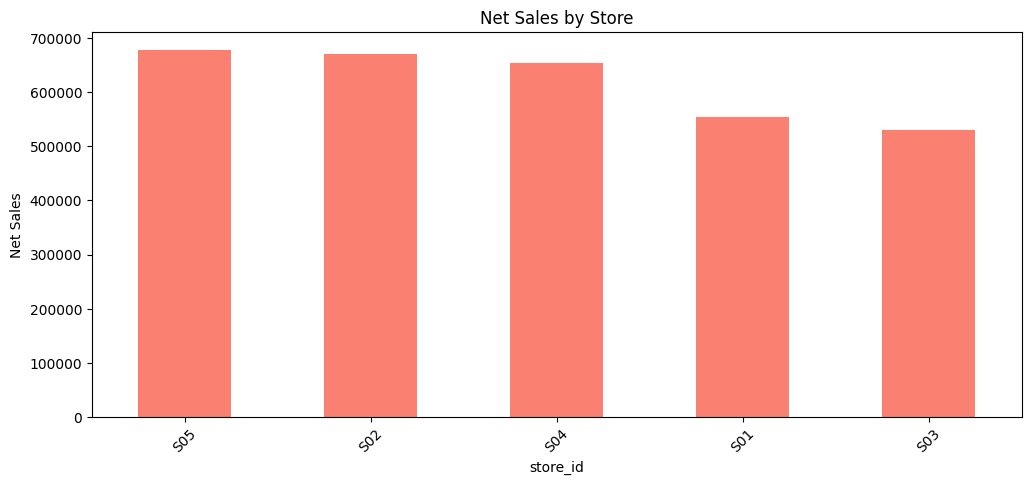

In [22]:
# Sales by region
region_sales = df.groupby('region')['net_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Net Sales by Region")
plt.ylabel("Net Sales")
plt.show()

# Sales by store
store_sales = df.groupby('store_id')['net_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
store_sales.plot(kind='bar', color='salmon')
plt.title("Net Sales by Store")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()
